In [14]:
!pip install mplfinance


     -------------------------------------- 75.0/75.0 kB 689.1 kB/s eta 0:00:00


# Importing required libraries 

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.layers import LSTM

# Data Loading and reading 

In [3]:
df = pd.read_csv("BTC_USD.csv")

In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [5]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2708,2022-02-15,42586.464844,44667.218750,42491.035156,44575.203125,44575.203125,22721659051
2709,2022-02-16,44578.277344,44578.277344,43456.691406,43961.859375,43961.859375,19792547657
2710,2022-02-17,43937.070313,44132.972656,40249.371094,40538.011719,40538.011719,26246662813
2711,2022-02-18,40552.132813,40929.152344,39637.617188,40030.976563,40030.976563,23310007704
2712,2022-02-19,40022.132813,40246.027344,40010.867188,40126.429688,40126.429688,22263900160


# checking Missing values 

In [6]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display the missing values
print(missing_values)


Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


# Exploratory Data Analysis

In [41]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2713 entries, 0 to 2712
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2713 non-null   object 
 1   Open          2713 non-null   float64
 2   High          2713 non-null   float64
 3   Low           2713 non-null   float64
 4   Close         2713 non-null   float64
 5   Adj Close     2713 non-null   float64
 6   Volume        2713 non-null   int64  
 7   Daily Return  2712 non-null   float64
 8   50-Day MA     2664 non-null   float64
 9   200-Day MA    2514 non-null   float64
dtypes: float64(8), int64(1), object(1)
memory usage: 212.1+ KB


In [43]:
# Data Description 
df.describe()

,Open,High,Low,Close,Adj Close,Volume,Daily Return,50-Day MA,200-Day MA
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03,2712.000000,2664.000000,2514.000000
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10,0.002412,11152.618737,10297.301273
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10,0.038835,15796.636871,13899.637573
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06,-0.371695,232.261620,245.701330
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07,-0.013140,614.173633,661.006300
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09,0.001996,6506.078838,6636.819122
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10,0.018252,10450.168650,9406.890600
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11,0.252472,60801.771016,49431.013242


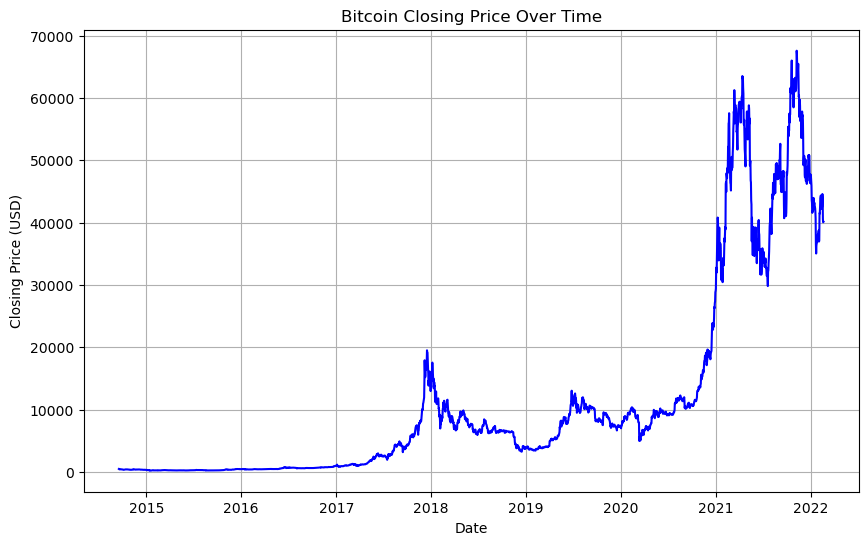

In [8]:
# Line Plot of Closing Price Over Time
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df['Date']), df['Close'], label='Closing Price', color='blue')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.show()

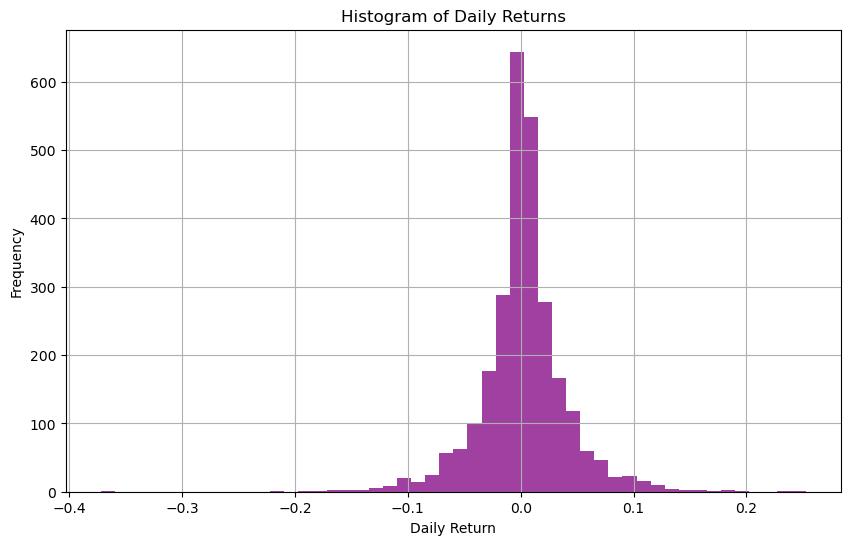

In [9]:
# Histogram of Daily Returns
df['Daily Return'] = df['Close'].pct_change()
plt.figure(figsize=(10, 6))
plt.hist(df['Daily Return'].dropna(), bins=50, color='purple', alpha=0.75)
plt.title('Histogram of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

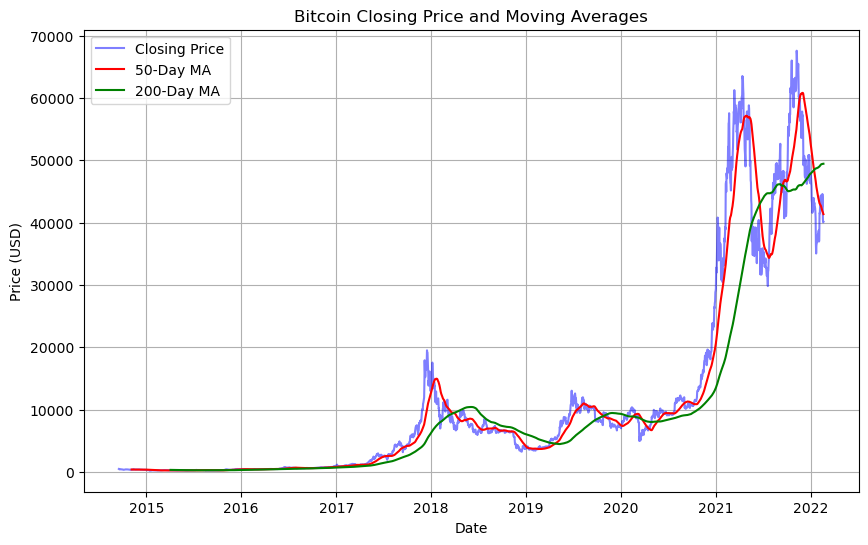

In [10]:
# Moving Average Plot
df['50-Day MA'] = df['Close'].rolling(window=50).mean()
df['200-Day MA'] = df['Close'].rolling(window=200).mean()
plt.figure(figsize=(10, 6))
plt.plot(pd.to_datetime(df['Date']), df['Close'], label='Closing Price', color='blue', alpha=0.5)
plt.plot(pd.to_datetime(df['Date']), df['50-Day MA'], label='50-Day MA', color='red')
plt.plot(pd.to_datetime(df['Date']), df['200-Day MA'], label='200-Day MA', color='green')
plt.title('Bitcoin Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

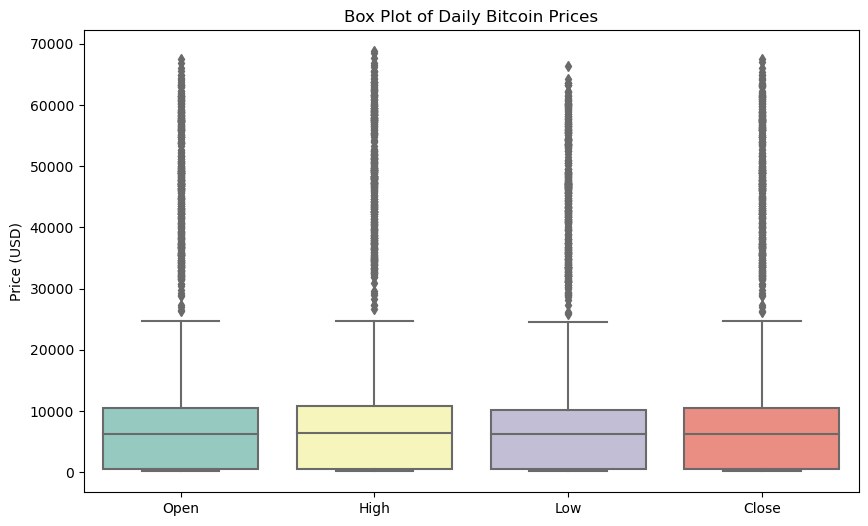

In [11]:
# Box Plot of Daily Prices
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']], palette='Set3')
plt.title('Box Plot of Daily Bitcoin Prices')
plt.ylabel('Price (USD)')
plt.show()

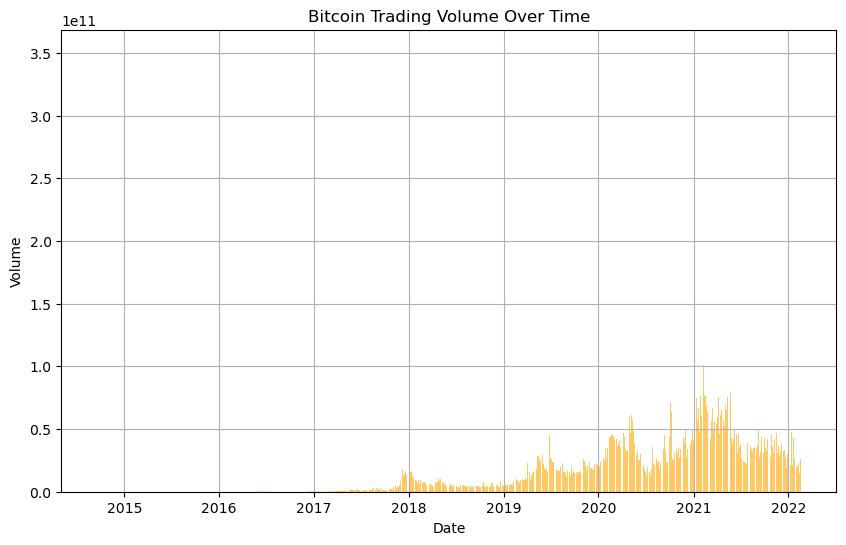

In [12]:
# Volume Traded Over Time
plt.figure(figsize=(10, 6))
plt.bar(pd.to_datetime(df['Date']), df['Volume'], color='orange', alpha=0.6)
plt.title('Bitcoin Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


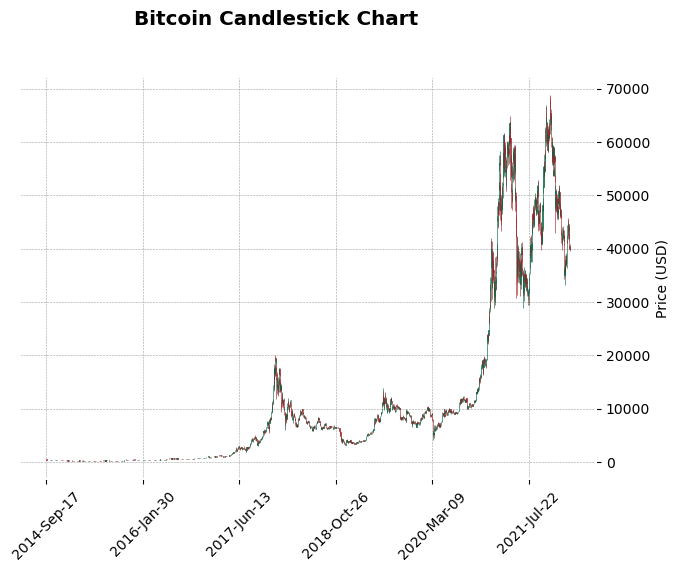

In [16]:
# Candlestick Chart
df_candlestick = df.copy()
df_candlestick['Date'] = pd.to_datetime(df_candlestick['Date'])
df_candlestick.set_index('Date', inplace=True)
mpf.plot(df_candlestick, type='candle', style='charles', title='Bitcoin Candlestick Chart', ylabel='Price (USD)')

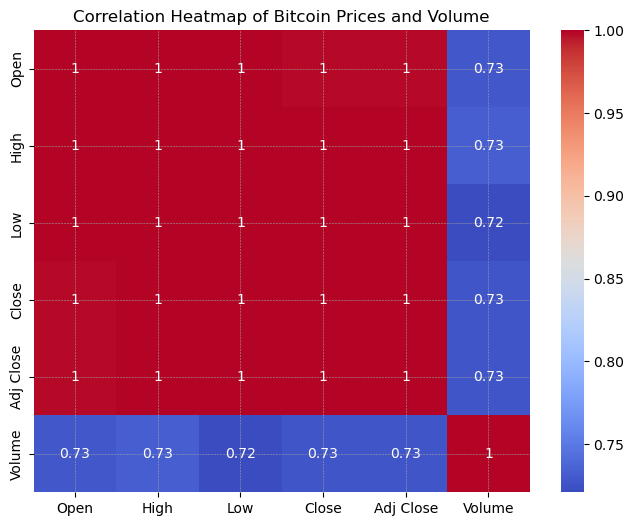

In [17]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Bitcoin Prices and Volume')
plt.show()

# Data Preprocessing 

In [18]:
# Selecting the relevant feature(s)
features = ['Close'] 
df_selected = df[features]

In [19]:
# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the selected data
scaled_data = scaler.fit_transform(df_selected)

# Convert scaled data back to a DataFrame for easier handling
df_scaled = pd.DataFrame(scaled_data, columns=features, index=df.index)


In [22]:
# Function to create sequences for time-series data
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i + sequence_length])
        y.append(data[i + sequence_length])
    return np.array(X), np.array(y)

# Set sequence length (e.g., 60 days)
sequence_length = 60

# Create sequences
X, y = create_sequences(df_scaled.values, sequence_length)


In [23]:
# Split into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, {y_test.shape}")


Training data shape: (2122, 60, 1), (2122, 1)
Testing data shape: (531, 60, 1), (531, 1)


# Recurrent Neural Network

In [25]:
# Define the RNN model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])))
rnn_model.add(Dense(units=1))

# Compile the model
rnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Display model summary
rnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2651 (10.36 KB)
Trainable params: 2651 (10.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [26]:
# Train the RNN model
rnn_history = rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
67/67 [==============================] - 4s 25ms/step - loss: 0.0032 - val_loss: 0.1408
Epoch 2/50
67/67 [==============================] - 1s 17ms/step - loss: 2.7800e-04 - val_loss: 0.0751
Epoch 3/50
67/67 [==============================] - 1s 17ms/step - loss: 2.1981e-04 - val_loss: 0.0576
Epoch 4/50
67/67 [==============================] - 1s 17ms/step - loss: 1.8184e-04 - val_loss: 0.0433
Epoch 5/50
67/67 [==============================] - 1s 17ms/step - loss: 1.5645e-04 - val_loss: 0.0342
Epoch 6/50
67/67 [==============================] - 1s 19ms/step - loss: 1.3779e-04 - val_loss: 0.0263
Epoch 7/50
67/67 [==============================] - 1s 18ms/step - loss: 1.2410e-04 - val_loss: 0.0240
Epoch 8/50
67/67 [==============================] - 1s 17ms/step - loss: 1.0851e-04 - val_loss: 0.0204
Epoch 9/50
67/67 [==============================] - 1s 18ms/step - loss: 1.0090e-04 - val_loss: 0.0172
Epoch 10/50
67/67 [==============================] - 1s 17ms/step - loss: 9.4

In [27]:
# Evaluate the RNN model
rnn_loss = rnn_model.evaluate(X_test, y_test)
print(f"RNN Model Test Loss: {rnn_loss}")


17/17 [==============================] - 0s 5ms/step - loss: 0.0019
RNN Model Test Loss: 0.0019053613068535924


17/17 [==============================] - 0s 6ms/step


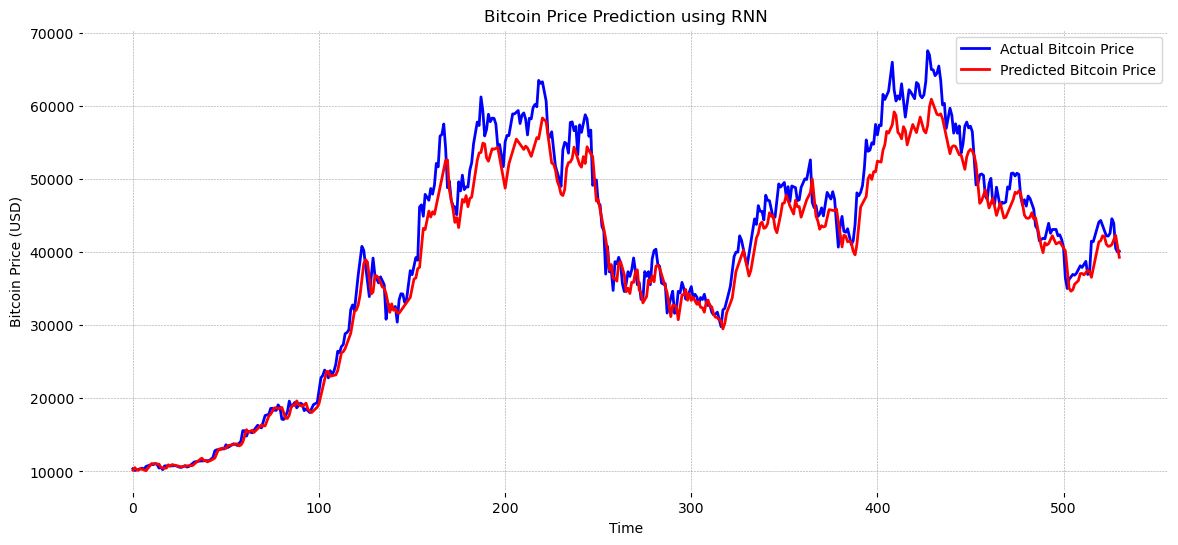

In [28]:
# Make predictions
rnn_predictions = rnn_model.predict(X_test)

# Inverse transform the predictions and actual values to original scale
rnn_predictions = scaler.inverse_transform(rnn_predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(y_test_rescaled, color='blue', label='Actual Bitcoin Price')
plt.plot(rnn_predictions, color='red', label='Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using RNN')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
plt.show()


# Long Short-Term Memory model

In [29]:
# Define the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
lstm_model.add(LSTM(units=50, activation='tanh'))
lstm_model.add(Dense(units=1))

# Compile the model
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# Display model summary
lstm_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
# Train the LSTM model
lstm_history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
67/67 [==============================] - 16s 104ms/step - loss: 5.4433e-04 - val_loss: 0.0043
Epoch 2/50
67/67 [==============================] - 5s 79ms/step - loss: 1.0261e-04 - val_loss: 0.0072
Epoch 3/50
67/67 [==============================] - 5s 78ms/step - loss: 9.6561e-05 - val_loss: 0.0131
Epoch 4/50
67/67 [==============================] - 5s 78ms/step - loss: 8.4921e-05 - val_loss: 0.0293
Epoch 5/50
67/67 [==============================] - 5s 79ms/step - loss: 7.2678e-05 - val_loss: 0.0234
Epoch 6/50
67/67 [==============================] - 5s 80ms/step - loss: 6.6565e-05 - val_loss: 0.0287
Epoch 7/50
67/67 [==============================] - 5s 75ms/step - loss: 6.4113e-05 - val_loss: 0.0273
Epoch 8/50
67/67 [==============================] - 5s 76ms/step - loss: 6.0772e-05 - val_loss: 0.0220
Epoch 9/50
67/67 [==============================] - 5s 76ms/step - loss: 6.2283e-05 - val_loss: 0.0236
Epoch 10/50
67/67 [==============================] - 5s 77ms/step - los

In [31]:
# Evaluate the LSTM model
lstm_loss = lstm_model.evaluate(X_test, y_test)
print(f"LSTM Model Test Loss: {lstm_loss}")


17/17 [==============================] - 0s 22ms/step - loss: 0.0053
LSTM Model Test Loss: 0.005262084770947695


17/17 [==============================] - 2s 27ms/step


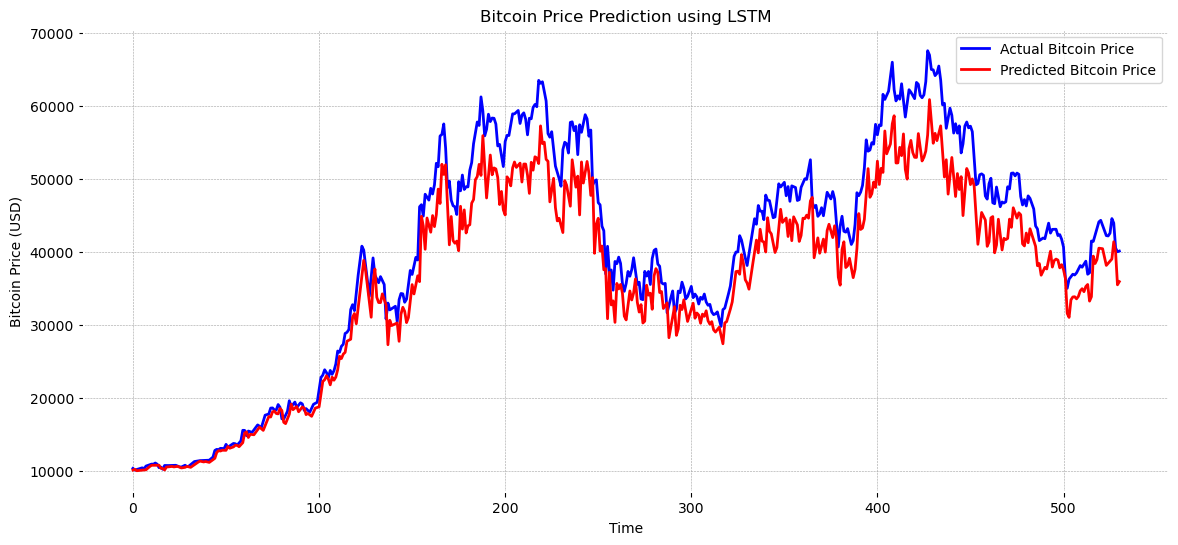

In [32]:
# Make predictions
lstm_predictions = lstm_model.predict(X_test)

# Inverse transform the predictions and actual values to original scale
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Plot the results
plt.figure(figsize=(14, 6))
plt.plot(y_test_rescaled, color='blue', label='Actual Bitcoin Price')
plt.plot(lstm_predictions, color='red', label='Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Bitcoin Price (USD)')
plt.legend()
plt.show()


# Model Comparison Graphs

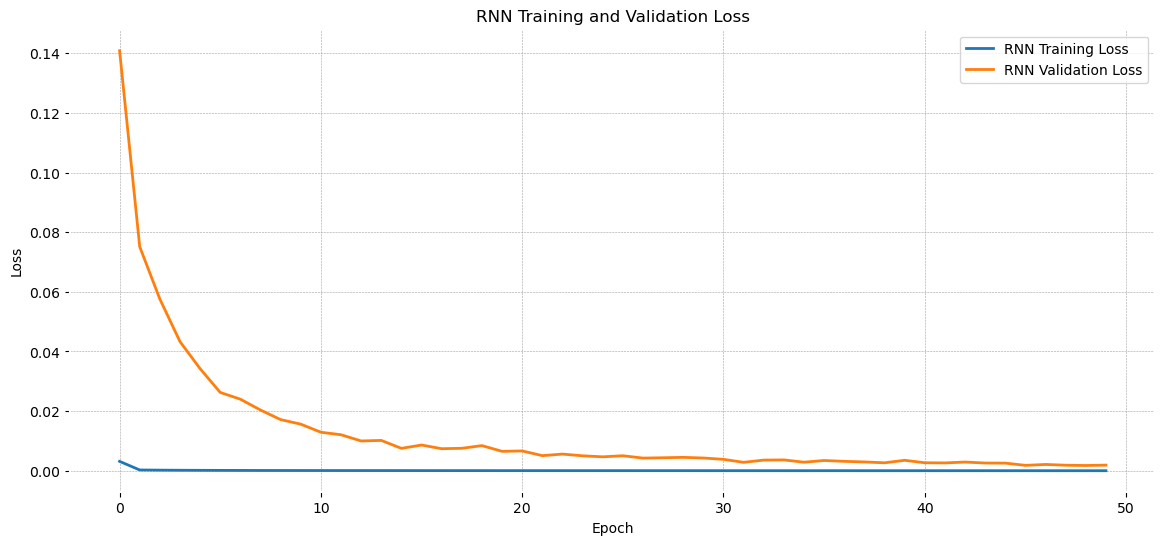

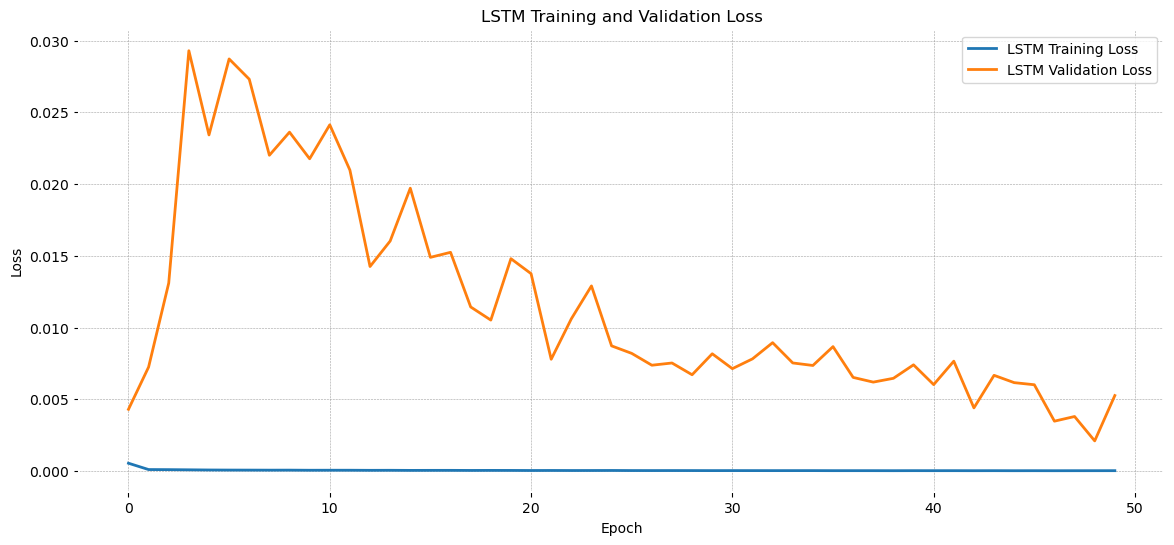

In [33]:
# Plot training and validation loss for RNN
plt.figure(figsize=(14, 6))
plt.plot(rnn_history.history['loss'], label='RNN Training Loss')
plt.plot(rnn_history.history['val_loss'], label='RNN Validation Loss')
plt.title('RNN Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation loss for LSTM
plt.figure(figsize=(14, 6))
plt.plot(lstm_history.history['loss'], label='LSTM Training Loss')
plt.plot(lstm_history.history['val_loss'], label='LSTM Validation Loss')
plt.title('LSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


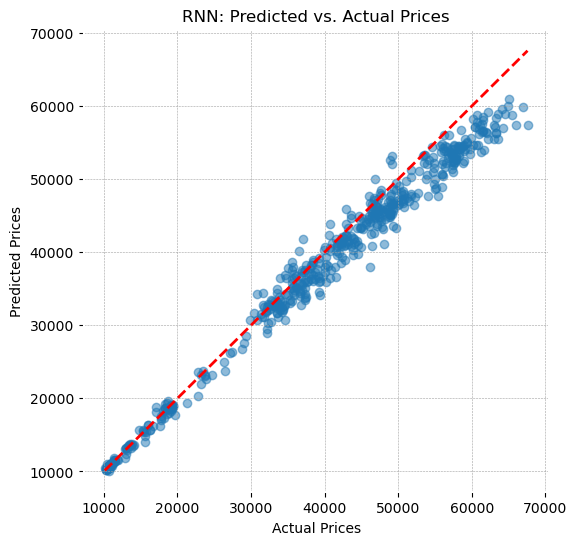

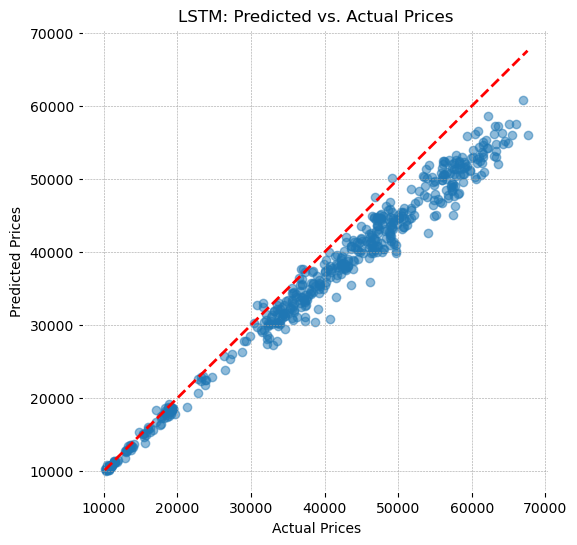

In [34]:
# Predicted vs. Actual Prices for RNN
plt.figure(figsize=(6, 6))
plt.scatter(y_test_rescaled, rnn_predictions, alpha=0.5)
plt.plot([y_test_rescaled.min(), y_test_rescaled.max()], [y_test_rescaled.min(), y_test_rescaled.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('RNN: Predicted vs. Actual Prices')
plt.show()

# Predicted vs. Actual Prices for LSTM
plt.figure(figsize=(6, 6))
plt.scatter(y_test_rescaled, lstm_predictions, alpha=0.5)
plt.plot([y_test_rescaled.min(), y_test_rescaled.max()], [y_test_rescaled.min(), y_test_rescaled.max()], 'r--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('LSTM: Predicted vs. Actual Prices')
plt.show()


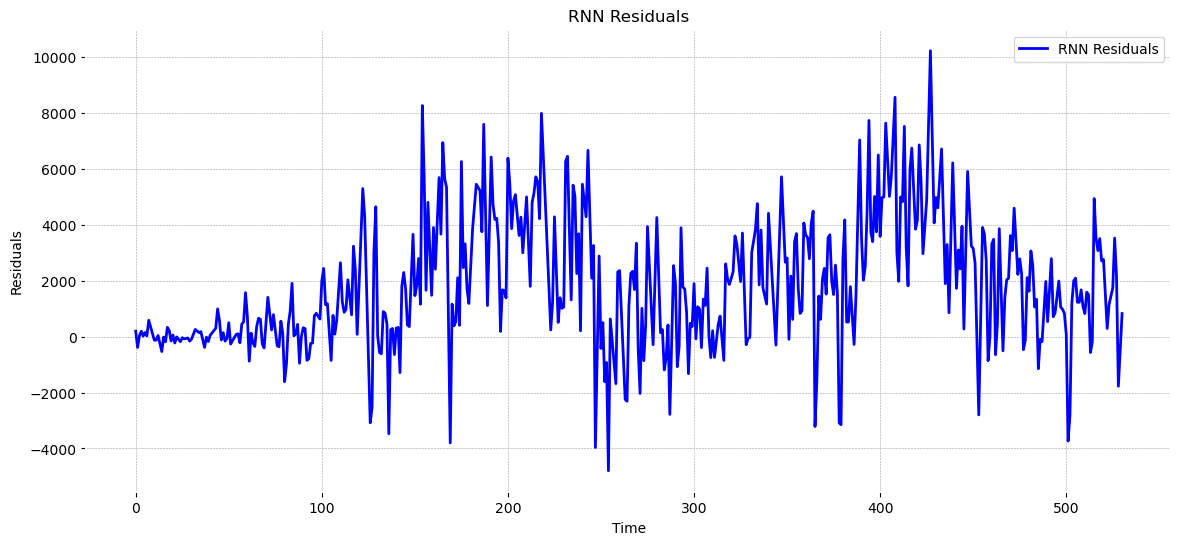

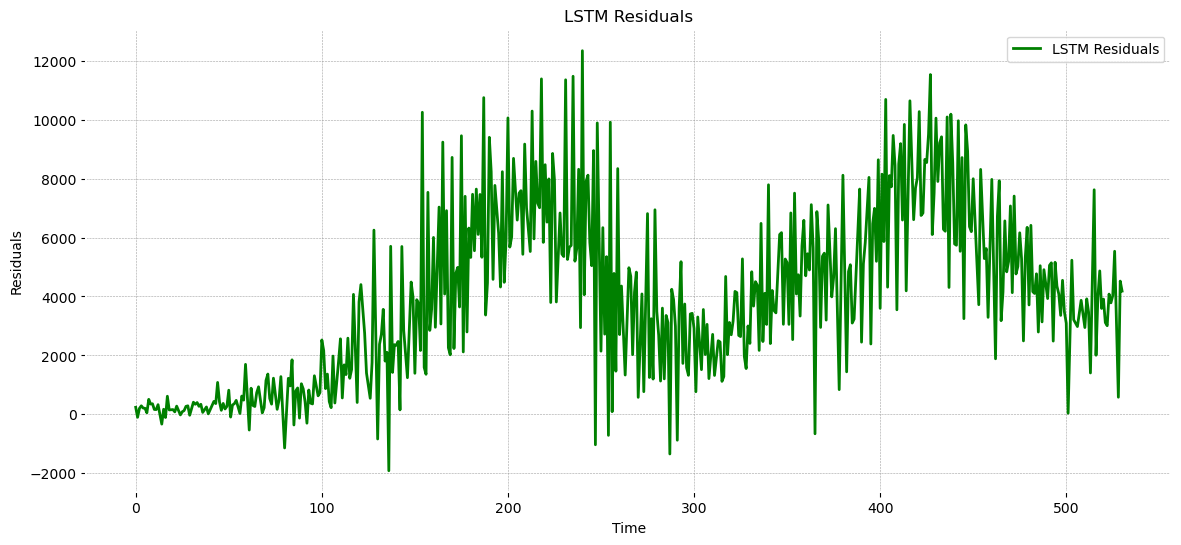

In [35]:
# Residuals for RNN
rnn_residuals = y_test_rescaled - rnn_predictions

plt.figure(figsize=(14, 6))
plt.plot(rnn_residuals, label='RNN Residuals', color='blue')
plt.title('RNN Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.legend()
plt.show()

# Residuals for LSTM
lstm_residuals = y_test_rescaled - lstm_predictions

plt.figure(figsize=(14, 6))
plt.plot(lstm_residuals, label='LSTM Residuals', color='green')
plt.title('LSTM Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.legend()
plt.show()


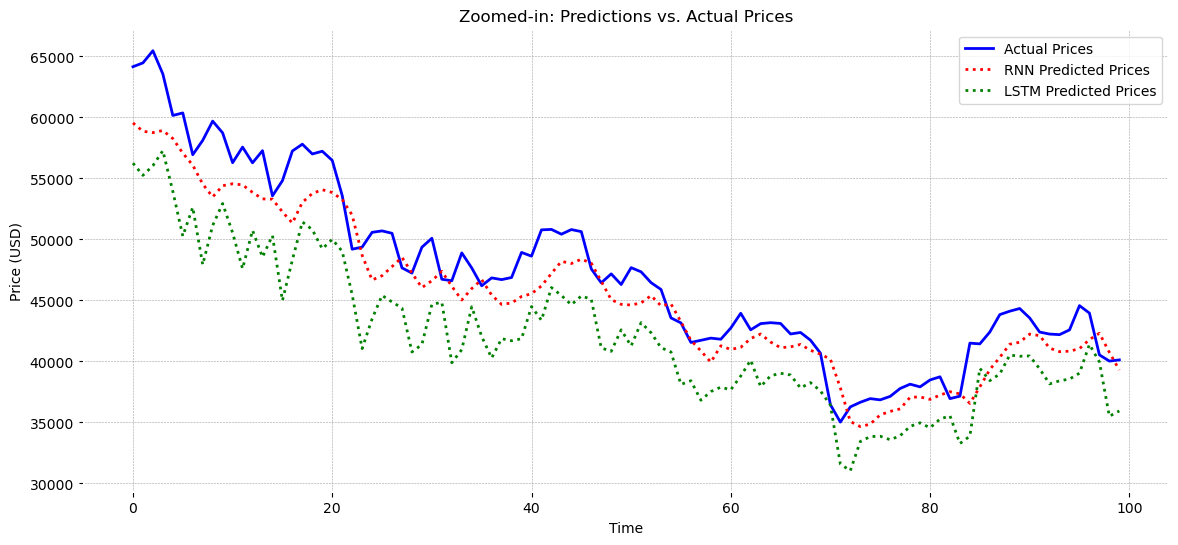

In [36]:
# Choose a specific timeframe to zoom in
zoom_start = -100  # Last 100 points
zoom_end = None

plt.figure(figsize=(14, 6))
plt.plot(y_test_rescaled[zoom_start:zoom_end], label='Actual Prices', color='blue')
plt.plot(rnn_predictions[zoom_start:zoom_end], label='RNN Predicted Prices', color='red', linestyle='dotted')
plt.plot(lstm_predictions[zoom_start:zoom_end], label='LSTM Predicted Prices', color='green', linestyle='dotted')
plt.title('Zoomed-in: Predictions vs. Actual Prices')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()


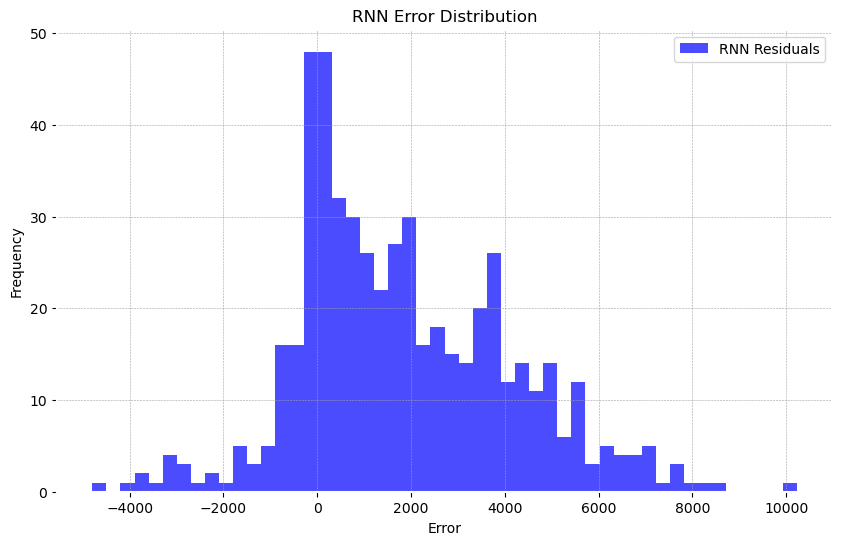

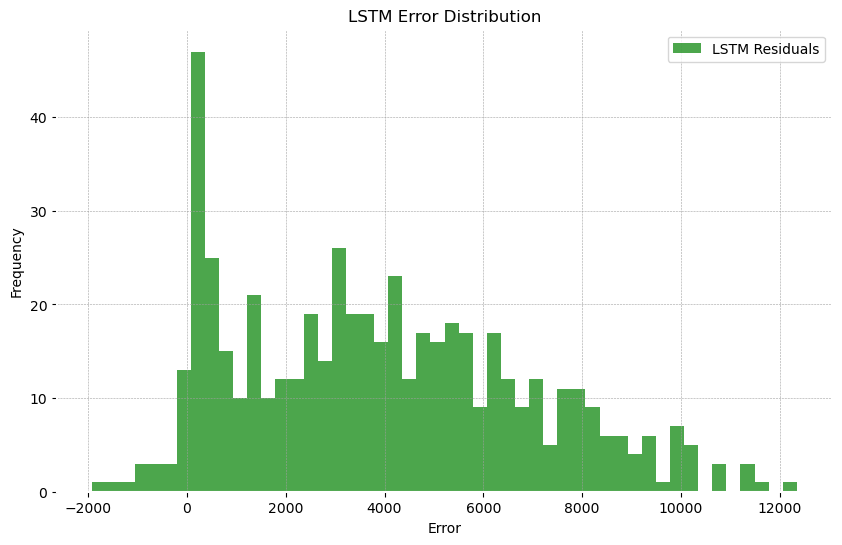

In [37]:
# Error distribution for RNN
plt.figure(figsize=(10, 6))
plt.hist(rnn_residuals, bins=50, alpha=0.7, color='blue', label='RNN Residuals')
plt.title('RNN Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Error distribution for LSTM
plt.figure(figsize=(10, 6))
plt.hist(lstm_residuals, bins=50, alpha=0.7, color='green', label='LSTM Residuals')
plt.title('LSTM Error Distribution')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.legend()
plt.show()


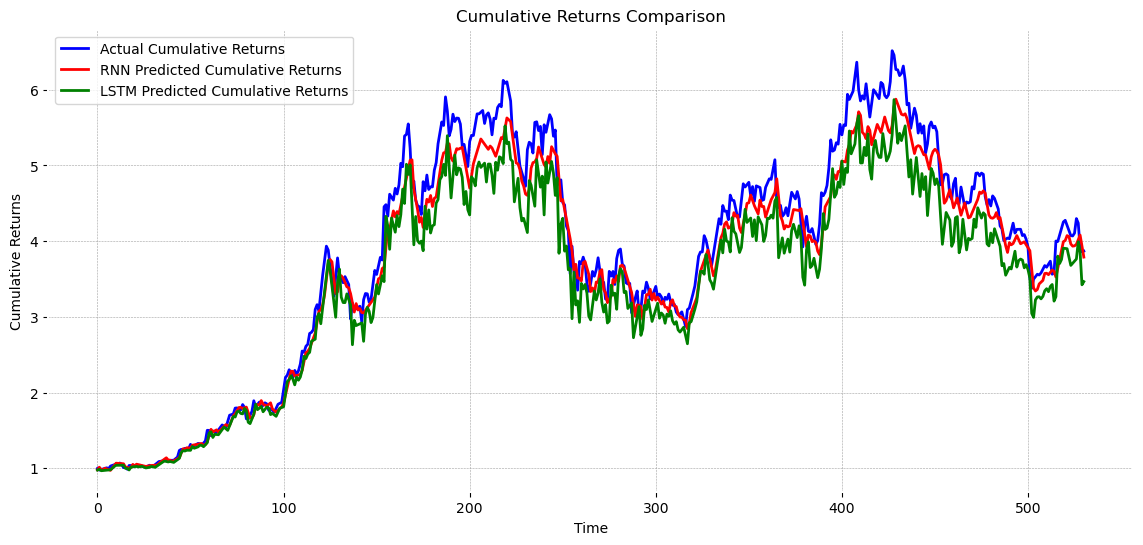

In [39]:
# Calculate cumulative returns for actual and predicted prices
actual_returns = y_test_rescaled / y_test_rescaled[0]
rnn_predicted_returns = rnn_predictions / y_test_rescaled[0]
lstm_predicted_returns = lstm_predictions / y_test_rescaled[0]

plt.figure(figsize=(14, 6))
plt.plot(actual_returns, label='Actual Cumulative Returns', color='blue')
plt.plot(rnn_predicted_returns, label='RNN Predicted Cumulative Returns', color='red')
plt.plot(lstm_predicted_returns, label='LSTM Predicted Cumulative Returns', color='green')
plt.title('Cumulative Returns Comparison')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()


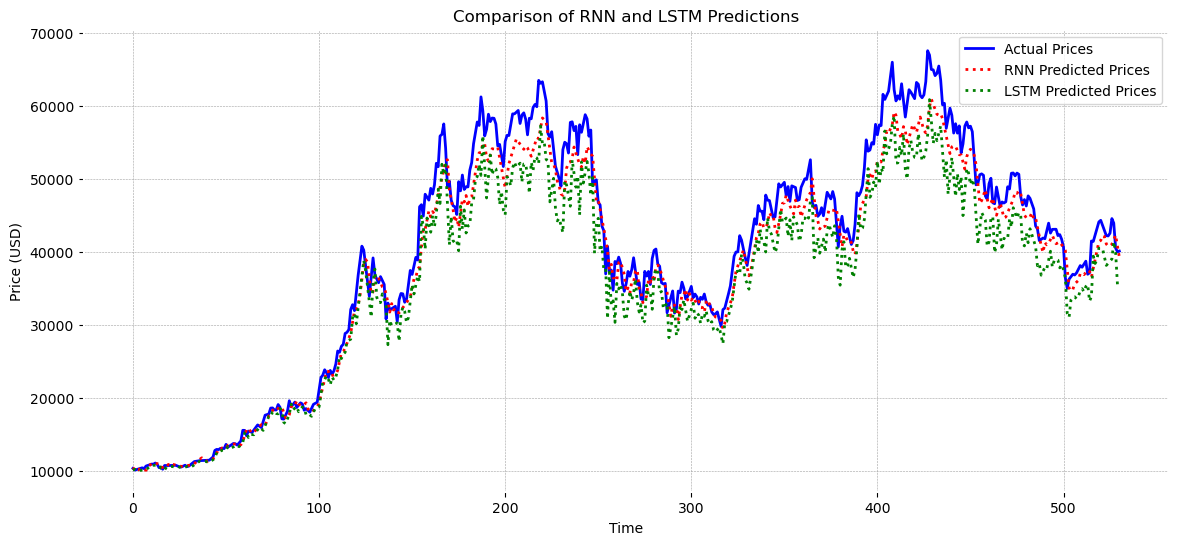

In [40]:
# Comparison of RNN and LSTM predictions 
plt.figure(figsize=(14, 6))
plt.plot(y_test_rescaled, label='Actual Prices', color='blue')
plt.plot(rnn_predictions, label='RNN Predicted Prices', color='red', linestyle='dotted')
plt.plot(lstm_predictions, label='LSTM Predicted Prices', color='green', linestyle='dotted')
plt.title('Comparison of RNN and LSTM Predictions')
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()
